In [32]:
import pandas as pd
import numpy as np


In [33]:
from google.colab import files
files.upload()

Saving training.csv to training (1).csv


{'training (1).csv': b'Day,Outlook,Temperature,Humidity,Wind,PlayTennis\r\nD1,Sunny,Hot,High,Weak,No\r\nD2,Sunny,Hot,High,Strong,No\r\nD3,Overcast,Hot,High,Weak,Yes\r\nD4,Rain,Mild,High,Weak,Yes\r\nD5,Rain,Cool,Normal,Weak,Yes\r\nD6,Rain,Cool,Normal,Strong,No\r\nD7,Overcast,Cool,Normal,Strong,Yes\r\nD8,Sunny,Mild,High,Weak,No\r\nD9,Sunny,Cool,Normal,Weak,Yes\r\nD10,Rain,Mild,Normal,Weak,Yes\r\nD11,Sunny,Mild,Normal,Strong,Yes\r\nD12,Overcast,Mild,High,Strong,Yes\r\nD13,Overcast,Hot,Normal,Weak,Yes\r\nD14,Rain,Mild,High,Strong,No\r\n'}

In [34]:
df=pd.read_csv('training.csv')
df.head(5)

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [35]:
df.shape

(14, 6)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)
df.head(5)

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1


In [37]:
x=df.drop(['PlayTennis'],axis=1)
x.head(4)

,Day,Outlook,Temperature,Humidity,Wind
0,0,2,1,0,1
1,6,2,1,0,0
2,7,0,1,0,1
3,8,1,2,0,1


In [38]:
y=df.PlayTennis

In [39]:
y.head(5)

,PlayTennis
0,0
1,0
2,1
3,1
4,1


In [44]:
print(x_train.shape)
print(len(y_train))


(12, 5)
11


In [45]:
print(x_train)
print(y_train)

    Day  Outlook  Temperature  Humidity  Wind
6    11        0            0         1     0
0     0        2            1         0     1
5    10        1            0         1     0
8    13        2            0         1     1
2     7        0            1         0     1
7    12        2            2         0     1
3     8        1            2         0     1
9     1        1            2         1     1
12    4        0            1         1     1
13    5        1            2         0     0
11    3        0            2         0     0
1     6        2            1         0     0
10    1
6     1
4     1
8     1
9     1
11    1
7     0
3     1
13    0
12    1
5     0
Name: PlayTennis, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',splitter='best')
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [63]:
y_pred=classifier.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.6666666666666666

In [66]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.5, 0.9, 'x[3] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.25, 0.7, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.7, 'x[4] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[0] <= 6.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.3, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

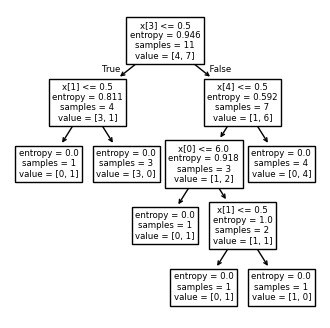

In [69]:
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=100)
tree.plot_tree(classifier)